<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Tarea semanal 4 Bis
## 30-05-2023
#### Autor: Yañez $\lambda$, Joaquin

En esta tarea semanal se nos pedía el diseño de un filtro pasa banda de máxima planicidad, partiendo de las siguientes especificaciones:

<img src="./Fotos/Consigna.png"/> 

A simple vista se observa que será del tipo Butterworth ya que en la frecuencia de paso la atenuación pedida es de $3dB$. A continuación se muestra el desarrollo de la obtención de la transferencia, el diagrama de polos y ceros y un gráfico aproximado de modulo de la transferencia 

In [1]:
from IPython.display import IFrame
IFrame("./TS4bis.pdf", width=800, height=800)

### Transformación de los polos

Es destacable como el filtro pasabajos prototipo calculado es de orden 3, sin embargo a la hora de aplicar el núcleo de transformación para obtener el filtro pasabandas deseado cada polo del pasabajos se convierte en un par de polos según la siguiente ecuación.

\begin{equation}
p_{i} =\frac{Q{filtro}}{\omega_{0filtro}} \cdot \frac{s^{2} + \omega_0^{2} }{s}
\end{equation}

Donde $p_i$ representa la posición de cada polo del pasabajos, resolviendo la ecuación queda una cuadrática cuyas dos raíces serán el mapeo de los polos del pasabandas. Quedando en evidencia que este último tendrá el doble de polos que el prototipo.

## Simulación en python

En este caso se realizó casi todo el ejercicio en python, para ir corroborando los resultados obtenidos en el papel con la herramientas de simulación:


In [21]:
# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti, pretty_print_SOS

In [3]:
# Parámetros del enunciado
amax = 3
amin = 20
k = 10 #expresada en dB

fpi = 1600
fsi = 1250

fps = 2500  
fss = 3200

#Cálculo de la frecuencia central del filtro
fo = np.sqrt(fpi*fps)
fo_b = np.sqrt(fsi*fss)
print("f0 =", fo)
print("f0_b =", fo_b)

f0 = 2000.0
f0_b = 2000.0


Se observa que como ambas frecuencias centrales obtienen el mismo valor el filtro es simétrico en cuanto a las frecuencias de stop por lo que a la hora de armar el prototipo se puede elegir cualquiera de las dos ya que se mapearán al mismo valor absoluto.

In [4]:
# Normalización de las frecuencias
norma_w = 2*np.pi*fo

w0 = 2*np.pi*fo/norma_w
wpi = 2*np.pi*fpi/norma_w
wsi = 2*np.pi*fsi/norma_w

wps = 2*np.pi*fps/norma_w
wss = 2*np.pi*fss/norma_w

In [5]:
#Parámetros del pasabanda
BW = fps-fpi
Q = fo/BW
gain_w0 = 10**(k/20)

print("BW =", BW, "Q_pb =", Q, "K =", gain_w0 )
#Transformamos al filtro pasabajos prototipo
Wpi = Q*(w0**2-wpi**2)/wpi/w0
Wsi = Q*(w0**2-wsi**2)/wsi/w0
Wps = Q*(w0**2-wps**2)/wps/w0
Wss = Q*(w0**2-wss**2)/wss/w0

print("Wpi =", Wpi, "Wsi =", Wsi)
print("Wpi =", Wps, "Wss =", Wss)

BW = 900 Q_pb = 2.2222222222222223 K = 3.1622776601683795
Wpi = 0.9999999999999996 Wsi = 2.166666666666667
Wpi = -1.0 Wss = -2.1666666666666674


Queda en evidencia la simetría del filtro por lo que es arbitrario si utilizar los valores de corte inferior o superior, en este caso se utilizaran los inferiores.

In [6]:
Wp = Wpi
Ws = Wsi

# Parámetros del filtro pasabajo
ee = 10**(amax/10)-1

print("epsilon^2 =", ee)

n = 0
for i in  range (1, 5):
       at = 10*np.log10(1+ee* Ws**(2*i))
       print("Si n =", i, "Atenuación en Ws =", at)
       if (at > amin and n == 0):
           n = i
print ("El orden del filtro elegido es n =", n)                                                             

epsilon^2 = 0.9952623149688795
Si n = 1 Atenuación en Ws = 7.537518146343931
Si n = 2 Atenuación en Ws = 13.604684544411922
Si n = 3 Atenuación en Ws = 20.16887700413639
Si n = 4 Atenuación en Ws = 26.851719304788638
El orden del filtro elegido es n = 3


Transferencia del pasabajos prototipo:


<IPython.core.display.Math object>

Transferencia del pasabanda objetivo:


<IPython.core.display.Math object>

Como esto no es de mucha información es mejor seccionarla en transferencias de 2do orden:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

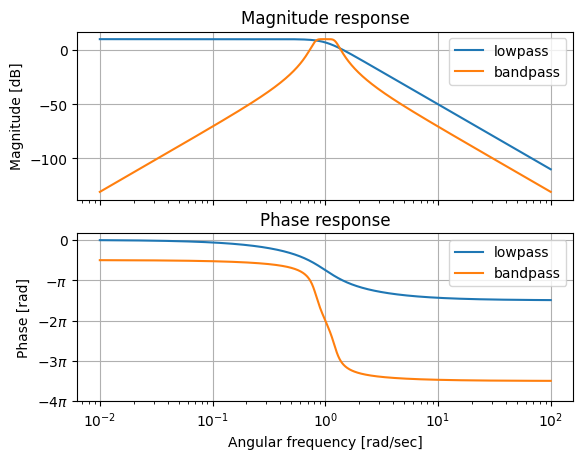

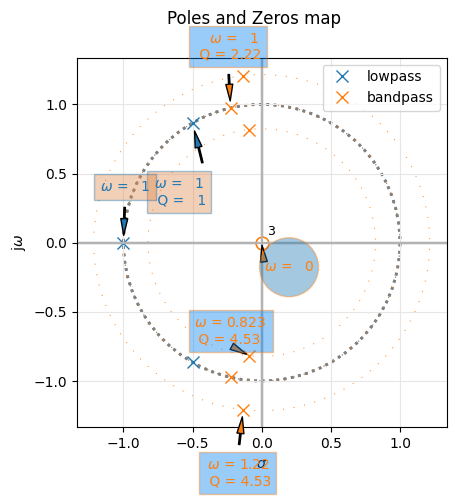

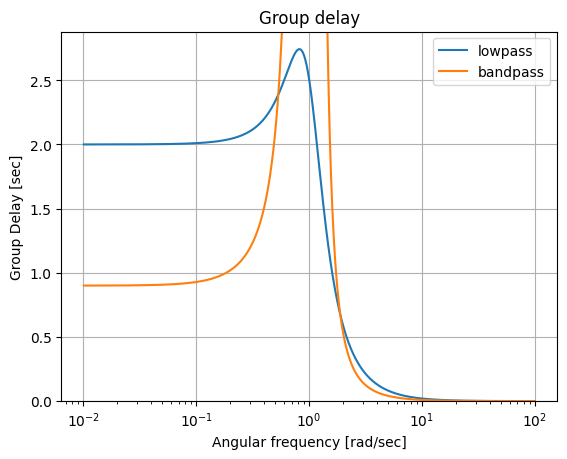

In [26]:
#Armado del prototipo pasabajos, recordamos que como el epsilon es casi igual a 1 usamos un butterworth
z, p, k = sig.buttap(n)

Nlp, Dlp = sig.zpk2tf(z, p, k)
Nlp = Nlp*gain_w0
tflp = TransferFunction( Nlp, Dlp )

print("Transferencia del pasabajos prototipo:")
pretty_print_lti(Nlp, Dlp)
#Plot del filtro butter
analyze_sys(tflp, sys_name='lowpass')


#Transformación del prototipo al filtro objetivo
Nbp, Dbp = sig.lp2bp(Nlp , Dlp, w0, BW/fo)
tfbp = TransferFunction(Nbp, Dbp)

zbp, pbp, kbp = sig.tf2zpk(Nbp, Dbp)
sos_bp = sig.zpk2sos(zbp, pbp, kbp)
sos_bp[sos_bp < 1e-6] = 0.0

print("Transferencia del pasabanda objetivo:")
pretty_print_lti(Nbp, Dbp)

print("Como esto no es de mucha información es mejor seccionarla en transferencias de 2do orden:")
pretty_print_SOS(sos_bp)

pretty_print_SOS(sos_bp, mode='omegayq')

analyze_sys(tfbp, sys_name='bandpass')

Es interesante comparar los diagramas de polos y ceros del filtro objetivo y del filtro prototipo. Se observa claramente como el pasabandas posee el doble de polos que el pasabajos como ya se habia anticipado teoricamente. También se aprecia que la transformación de cada polo tiene cierta relación con el polo en el pasabajos, el polo real se transforma en los dos polos sobre la circunferencia unitaria, y este tiene el Q del filtro pedido. Por otro lado los otros dos polos  complejos conjugados se transforman con el mismo Q para ambos pero en radios de $\omega$ distintos

### Implementación del filtro mediante circuitos Ackerberg-Mosberg

A continuación se realiza la implementación del circuito utilizando la estructura Ackerberg-Mosberg analizada a fondo en la [Tarea semanal 2](https://nbviewer.org/github/jyanezlanda/TC2/blob/80759951c8516650f4ab1160bc6ba4d3b19d15dc/W2/Ts2/Tarea_semanal_2.ipynb). Para este caso en particular se utilizarán 3 estructuras de este tipo en su configuración de pasabandas, se realizará una simulación normalizada y otra en la que se desnormalizará para poder obtener el filtro pedido en el enunciado.

<img src="./Fotos/Esquemático.png"/>
<img src="./Fotos/Out_normalizado.png"/>
<img src="./Fotos/Out_desnormalizado.png"/>
<img src="./Fotos/Detalle_salidas.png"/>

Se observa en las salidas que el filtro tiene mínimas imperfecciones en la banda de paso (Alguna ondulación mínima), esto se puede deber en parte al redondeo generado durante toda la cuenta  matemática, sin embargo estas diferencias son mínimas y se aprecia la planicidad en la banda de paso del filtro perfectamente.


## Conclusiones

De este trabajo se pudo comprobar que el diseñar filtros pasabandas ya no es tan facil en papel como lo eran los pasabajos y pasaaltos. Estos filtros ya llevan un trabajo matemático mas dificil donde cometer errores es mucho mas fácil, sin embargo se pueden realizar facilmente con las simulaciones dando resultados muy buenos como los del ejercicio en cuestión.